Import libraries, mount drive and change directory to `MedLife`

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
os.chdir('/content/drive/My Drive/MedLife')
print(os.getcwd())

# from defined_functions import detect_outlier

FileNotFoundError: ignored

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
def detect_outlier(data):

    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    indices = []
    for idx, y in enumerate(data):
        z_score = (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
            indices.append(idx)
    return indices, outliers

In [ ]:
df = pd.read_csv("data/Customers_fromJan1.csv", encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,mobile,gender,pincode,is_from_partner,total_order_value,delivered_order_count,order_count_6_month,last_order_date,last_ordered_source,last_order_value,last_therapy_name,main_therapy_name,medical_concern,eligibleforretention,is_subscription_pitched,is_app_install,avg_order_val,medlife_essentials_purchased,dob,chronic_vs_acute,zone,target
0,96056375,MALE,781004.0,False,1054.42,2,2,05:31.8,GO_RX,455.07,ALIMENTARY TRACT AND METABOLISM,ALIMENTARY TRACT AND METABOLISM,"GASTRO INTESTINAL,VITAMINS / MINERALS / NUTRIENTS",True,False,True,527.210,False,NaN,ACUTE,Rest of India,0
1,73132081,MALE,577598.0,False,486.81,1,5,49:42.3,GO_RX,61.40,"ALIMENTARY TRACT AND METABOLISM,DERMATOLOGICALS",RESPIRATORY SYSTEM,RESPIRATORY,True,False,True,81.135,False,NaN,ACUTE,Rest of India,0
2,73089827,NaN,NaN,False,473.00,1,1,52:52.0,GO_RX,473.00,VARIOUS,VARIOUS,VITAMINS / MINERALS / NUTRIENTS,True,False,True,473.000,False,NaN,ACUTE,NaN,0
3,77979255,NaN,742148.0,False,197.65,0,2,54:24.5,GO_RX,118.90,UNCLASSIFIED,ALIMENTARY TRACT AND METABOLISM,OTHERS,True,False,True,98.825,False,NaN,ACUTE,Rest of India,0
4,97121030,MALE,781335.0,False,1831.84,5,5,06:05.1,GO_RX,312.79,RESPIRATORY SYSTEM,RESPIRATORY SYSTEM,RESPIRATORY,True,False,True,366.368,False,NaN,ACUTE,Rest of India,0


In [ ]:
df.shape

(354950, 22)

In [ ]:
df.describe()

,total_order_value,delivered_order_count,order_count_6_month,last_order_value,avg_order_val,target
count,345413.000,350610.000,350610.000,345413.000,345413.000,350610.000
mean,18288.021,9.224,5.857,1062.169,1714.030,0.173
std,1504061.812,11.129,5.961,2277.191,281168.140,0.378
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,1740.240,2.000,2.000,323.520,412.817,0.000
50%,5588.400,5.000,4.000,651.260,720.210,0.000
75%,15770.410,12.000,8.000,1349.200,1292.695,0.000
max,721014236.500,66.000,907.000,531399.340,160224622.000,1.000


In [ ]:
df.columns

Index(['mobile', 'gender', 'pincode', 'is_from_partner', 'total_order_value',
       'delivered_order_count', 'order_count_6_month', 'last_order_date',
       'last_ordered_source', 'last_order_value', 'last_therapy_name',
       'main_therapy_name', 'medical_concern', 'eligibleforretention',
       'is_subscription_pitched', 'is_app_install', 'avg_order_val',
       'medlife_essentials_purchased', 'dob', 'chronic_vs_acute', 'zone',
       'target'],
      dtype='object')

Numeric Columns

- `total_order_value`
- `delivered_order_count`
- `order_count_6_month`
- `last_order_value`
- `avg_order_val`

Categorical Columns

 - `gender`, `pincode`, `is_from_partner`, ,
 `last_order_date`,      `last_ordered_source`, , `last_therapy_name`,       `main_therapy_name`, `medical_concern`, `eligibleforretention`,        `is_subscription_pitched`, `is_app_install`,       `medlife_essentials_purchased`, `dob`, `chronic_vs_acute`, `zone`,  `mobile`

Response Variable

 - `target`

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame({'Total':total, '% Missing':percent*100})
missing_data.head(20)

,Total,% Missing
dob,280253,78.955628
chronic_vs_acute,163672,46.111283
gender,59828,16.855332
last_therapy_name,57990,16.337512
medical_concern,52423,14.769122
main_therapy_name,52353,14.749401
is_app_install,23208,6.538386
zone,7093,1.998310
pincode,5948,1.675729
avg_order_val,5197,1.464150


### `mobile` column

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
df['mobile'].isnull().sum() # no missing values in the column
df['mobile'].nunique() # 352830 unique values
len(df['mobile']) - df['mobile'].nunique() # 2120 repeated values

2120

### `gender` column

In [ ]:
100*df['gender'].value_counts()/len(df)   # rest are missing values

MALE      67.930976
FEMALE    15.193689
OTHER      0.020003
Name: gender, dtype: float64

Impute with mode - `MALE`

In [ ]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

### `last_therapy_name`

 - Has 4326 classes
 - Values are text, drop column for now

In [ ]:
df['last_therapy_name'].nunique()

4326

### `avg_order_val`

1.46% missing values

 - min 0
 - max 160224622. Why?
 - median - 720
 - 75% 1289



In [ ]:
df['avg_order_val'].describe()

count   262310.000
mean       801.773
std        778.082
min          0.000
25%        352.927
50%        579.150
75%        980.782
max      16355.920
Name: avg_order_val, dtype: float64

In [ ]:
df['avg_order_val'].fillna(720.0, inplace=True)

### `total_order_value`

1.46% missing values.

 - 25% value is 1770
 - 75% value is 16457

Number of 0's  = 776 --> transactions with no order value </br>
Remove values greater than 16457, `detect_outlier` won't work as only 9 values are detected. Will have to do multiple iterations of detecting and removing, which doesn't make any sense.

What does `total_order_value` of 0 mean?

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['total_order_value'].describe()

count   262310.000
mean      4777.617
std       4330.428
min          0.000
25%       1202.600
50%       3318.090
75%       7413.913
max      16456.870
Name: total_order_value, dtype: float64

In [ ]:
len(df[df['total_order_value'] == 0])

776

In [ ]:
df = df[df['total_order_value'] < 16457]

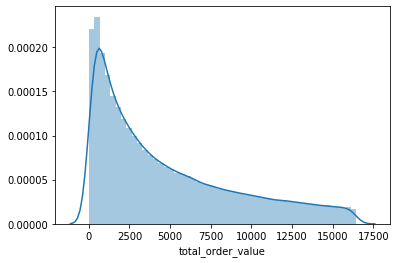

In [ ]:
sns.distplot(df['total_order_value'])

Impute with median = 3318

In [ ]:
df['total_order_value'].fillna(3318.1, inplace=True)

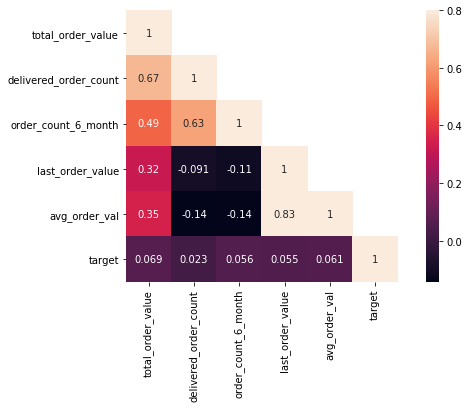

In [ ]:
import matplotlib.pyplot as plt
corrMatt = df[['total_order_value',	'delivered_order_count','order_count_6_month','last_order_value','avg_order_val','target']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

### Check for data imbalance

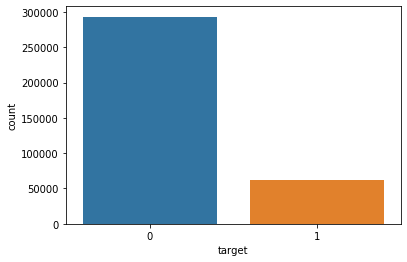

In [ ]:
sns.countplot(df['target'])

In [ ]:
# % imbalance
# len(df[df['target']==1])/len(df['target'])*100
100*df['target'].value_counts()/len(df)

0   82.618
1   17.382
Name: target, dtype: float64

Drop columns

- `dob` and `chronic_vs_acute` have a high percentage of missing values
- `pincode` and `mobile` don't hold any value

Try to identify state of the customer from pincode and then use state - max classes = 29.

In [ ]:
df.drop(['mobile', 'dob', 'chronic_vs_acute', 'pincode'], axis=1, inplace=True)

In [ ]:
100*df['target'].value_counts()/len(df)

0   82.618
1   17.382
Name: target, dtype: float64

### `delivered_order_count`

 - No missing values

In [ ]:
df['delivered_order_count'].describe()

count   354950.000
mean        10.421
std         18.785
min          0.000
25%          2.000
50%          5.000
75%         13.000
max       2487.000
Name: delivered_order_count, dtype: float64

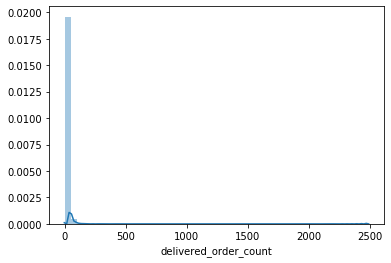

In [ ]:
sns.distplot(df['delivered_order_count'])

In [ ]:
def detect_outlier(data):

    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    indices = []
    for idx, y in enumerate(data):
        z_score = (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
            indices.append(idx)
    return indices, outliers

In [ ]:
# from defined_functions import detect_outlier

indices, _ = detect_outlier(df['delivered_order_count'])

In [ ]:
len(out)

4340

In [ ]:
df.drop(indices, axis = 0, inplace = True)

### `is_from_partner`

 - No missing values

In [ ]:
df['is_from_partner'].value_counts()

False    328791
True      21819
Name: is_from_partner, dtype: int64

### `eligibleforretention`

 - No missing values

In [ ]:
df['eligibleforretention'].value_counts()

True     324664
False     23634
Name: eligibleforretention, dtype: int64

### Misc

In [ ]:
df = df.loc[:, ['is_from_partner', 'target', 'total_order_value', 'eligibleforretention', 'gender']]
df.head(3)

,is_from_partner,target,total_order_value,eligibleforretention
0,False,0,1054.420,True
1,False,0,486.810,True
2,False,0,473.000,True


In [ ]:
df.isnull().sum()

is_from_partner         0
target                  0
total_order_value       0
eligibleforretention    0
dtype: int64

In [ ]:
df.to_csv("cleaned.csv", index=False)